# Name     :- Yash Gupta
# Roll No. :- 2301560069
# Course   :- MCA
# Subject  :- AIML

 # Import Libraries:


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline


# Load the Dataset:


In [44]:
df = pd.read_csv("E:\\KRMU\\Subject\\Aiml\\Assignment 3\\Real Estate Price Prediction.csv")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
395,396,2012.917,21.2,512.54870,4,24.97400,121.53842,42.5
396,397,2012.667,37.1,918.63570,1,24.97198,121.55063,31.9
397,398,2013.417,13.1,1164.83800,4,24.99156,121.53406,32.2
398,399,2013.417,14.7,1717.19300,2,24.96447,121.51649,23.0


# Explore the Data:


In [45]:
# Display basic statistics and information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      400 non-null    int64  
 1   X1 transaction date                     400 non-null    float64
 2   X2 house age                            400 non-null    float64
 3   X3 distance to the nearest MRT station  400 non-null    float64
 4   X4 number of convenience stores         400 non-null    int64  
 5   X5 latitude                             400 non-null    float64
 6   X6 longitude                            400 non-null    float64
 7   Y house price of unit area              400 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 25.1 KB
None


In [46]:
print(df.describe())


               No  X1 transaction date  X2 house age  \
count  400.000000           400.000000    400.000000   
mean   200.500000          2013.152100     17.843250   
std    115.614301             0.281931     11.459092   
min      1.000000          2012.667000      0.000000   
25%    100.750000          2012.917000      9.550000   
50%    200.500000          2013.167000     16.150000   
75%    300.250000          2013.417000     28.725000   
max    400.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              400.000000   
mean                              1088.963903   
std                               1263.786284   
min                                 23.382840   
25%                                289.324800   
50%                                492.944150   
75%                               1451.241000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

In [47]:
# Renaming the coulmns
df.rename(columns={"X2 house age": "House_Age", "X3 distance to the nearest MRT station": "Dist_to_nearest_MRT", "X4 number of convenience stores":"Number_of_stores", "X5 latitude":"Latitude", \
                  "X6 longitude" : "Longitude", "Y house price of unit area":"Price_per_unit"}, inplace = True)
df

,No,X1 transaction date,House_Age,Dist_to_nearest_MRT,Number_of_stores,Latitude,Longitude,Price_per_unit
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
395,396,2012.917,21.2,512.54870,4,24.97400,121.53842,42.5
396,397,2012.667,37.1,918.63570,1,24.97198,121.55063,31.9
397,398,2013.417,13.1,1164.83800,4,24.99156,121.53406,32.2
398,399,2013.417,14.7,1717.19300,2,24.96447,121.51649,23.0


# Check for missing values


In [48]:
print(df.isnull().sum())

No                     0
X1 transaction date    0
House_Age              0
Dist_to_nearest_MRT    0
Number_of_stores       0
Latitude               0
Longitude              0
Price_per_unit         0
dtype: int64


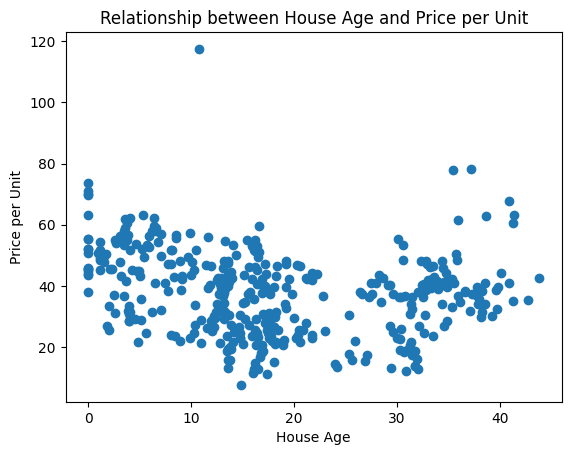

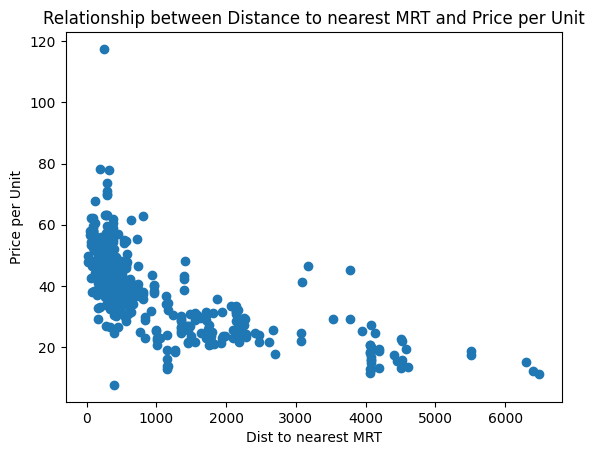

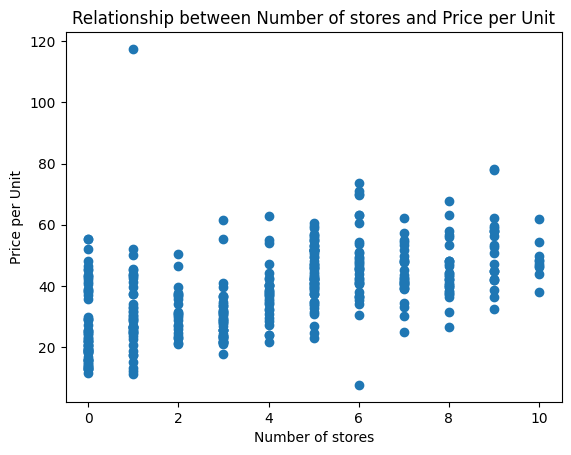

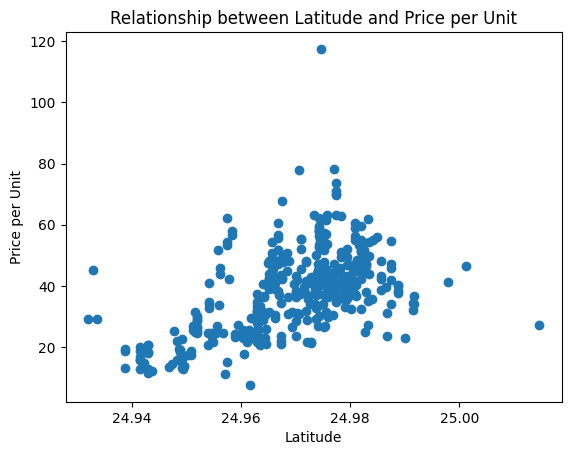

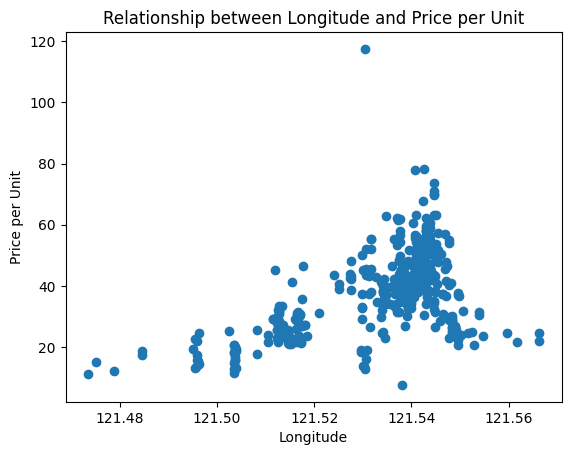

In [49]:
# Explore relationships between features and target variable using visualizations

plt.scatter(df['House_Age'], df['Price_per_unit'])
plt.xlabel('House Age')
plt.ylabel('Price per Unit')
plt.title('Relationship between House Age and Price per Unit')
plt.show()


plt.scatter(df['Dist_to_nearest_MRT'], df['Price_per_unit'])
plt.xlabel('Dist to nearest MRT')
plt.ylabel('Price per Unit')
plt.title('Relationship between Distance to nearest MRT and Price per Unit')
plt.show()


plt.scatter(df['Number_of_stores'], df['Price_per_unit'])
plt.xlabel('Number of stores')
plt.ylabel('Price per Unit')
plt.title('Relationship between Number of stores and Price per Unit')
plt.show()


plt.scatter(df['Latitude'], df['Price_per_unit'])
plt.xlabel('Latitude')
plt.ylabel('Price per Unit')
plt.title('Relationship between Latitude and Price per Unit')
plt.show()


plt.scatter(df['Longitude'], df['Price_per_unit'])
plt.xlabel('Longitude')
plt.ylabel('Price per Unit')
plt.title('Relationship between Longitude and Price per Unit')
plt.show()

# Explore correlations between features

In [51]:
df.corr()

,No,X1 transaction date,House_Age,Dist_to_nearest_MRT,Number_of_stores,Latitude,Longitude,Price_per_unit
No,1.000000,-0.032462,-0.014089,-0.007314,-0.031809,-0.008658,-0.017120,-0.028206
X1 transaction date,-0.032462,1.000000,0.018047,0.057623,0.014592,0.031767,-0.038422,0.085007
House_Age,-0.014089,0.018047,1.000000,0.028505,0.050603,0.050173,-0.046148,-0.212950
Dist_to_nearest_MRT,-0.007314,0.057623,0.028505,1.000000,-0.597799,-0.585064,-0.812281,-0.670909
Number_of_stores,-0.031809,0.014592,0.050603,-0.597799,1.000000,0.437545,0.450673,0.563936
Latitude,-0.008658,0.031767,0.050173,-0.585064,0.437545,1.000000,0.411648,0.544542
Longitude,-0.017120,-0.038422,-0.046148,-0.812281,0.450673,0.411648,1.000000,0.524065
Price_per_unit,-0.028206,0.085007,-0.212950,-0.670909,0.563936,0.544542,0.524065,1.000000


# Build Multiple Linear Regression Models for Various Queries:


### Query 1: Predicting Property Prices using All Features

In [64]:
# Select features and target variable
X_all = df[['House_Age', 'Dist_to_nearest_MRT', 'Number_of_stores', 'Latitude', 'Longitude']]
y_all = df['Price_per_unit']

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Build the multiple linear regression model
model_all = LinearRegression()
model_all.fit(X_train_all, y_train_all)

# Make predictions
y_pred_all = model_all.predict(X_test_all)

# Evaluate the performance
mse_all = mean_squared_error(y_test_all, y_pred_all)
r2_all = r2_score(y_test_all, y_pred_all)

print(f'Mean Squared Error (All Features): {mse_all:.2f}')
print(f'R-squared (All Features): {r2_all:.2f}')


Mean Squared Error (All Features): 93.04
R-squared (All Features): 0.45


### Query 2: Nonlinear Relationship with House Age (Polynomial Regression)

In [53]:
degree = 2
polyreg_house_age = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_house_age.fit(X_train_all[['House_Age']], y_train_all)
y_pred_house_age = polyreg_house_age.predict(X_test_all[['House_Age']])
mse_house_age = mean_squared_error(y_test_all, y_pred_house_age)
r2_house_age = r2_score(y_test_all, y_pred_house_age)
print(f'Mean Squared Error (Polynomial Regression - House Age): {mse_house_age:.2f}')
print(f'R-squared (Polynomial Regression - House Age): {r2_house_age:.2f}')


Mean Squared Error (Polynomial Regression - House Age): 139.44
R-squared (Polynomial Regression - House Age): 0.18


### Query 3: Interaction between Latitude and Longitude

In [56]:
df['Lat_Long_Interaction'] = df['Latitude'] * df['Longitude']
X_interaction = df[['House_Age', 'Dist_to_nearest_MRT', 'Number_of_stores', 'Latitude', 'Longitude', 'Lat_Long_Interaction']]
X_interaction

,House_Age,Dist_to_nearest_MRT,Number_of_stores,Latitude,Longitude,Lat_Long_Interaction
0,32.0,84.87882,10,24.98298,121.54024,3036.437385
1,19.5,306.59470,9,24.98034,121.53951,3036.098283
2,13.3,561.98450,5,24.98746,121.54391,3037.073589
3,13.3,561.98450,5,24.98746,121.54391,3037.073589
4,5.0,390.56840,5,24.97937,121.54245,3036.053829
...,...,...,...,...,...,...
395,21.2,512.54870,4,24.97400,121.53842,3035.300501
396,37.1,918.63570,1,24.97198,121.55063,3035.359901
397,13.1,1164.83800,4,24.99156,121.53406,3037.325753
398,14.7,1717.19300,2,24.96447,121.51649,3033.594769


### Query 4: Nonlinear Relationship with Distance to MRT (SVR)

In [58]:
from sklearn.svm import SVR
svr_model_dist_to_mrt = SVR(kernel='rbf')
svr_model_dist_to_mrt.fit(X_train_all[['Dist_to_nearest_MRT']], y_train_all)
y_pred_svr_dist_to_mrt = svr_model_dist_to_mrt.predict(X_test_all[['Dist_to_nearest_MRT']])
mse_svr_dist_to_mrt = mean_squared_error(y_test_all, y_pred_svr_dist_to_mrt)
r2_svr_dist_to_mrt = r2_score(y_test_all, y_pred_svr_dist_to_mrt)
print(f'Mean Squared Error (SVR - Distance to MRT): {mse_svr_dist_to_mrt:.2f}')
print(f'R-squared (SVR - Distance to MRT): {r2_svr_dist_to_mrt:.2f}')

Mean Squared Error (SVR - Distance to MRT): 82.34
R-squared (SVR - Distance to MRT): 0.52


### Query 5: Multiple Linear Regression with Interaction Term


In [60]:
X_interaction = df[['House_Age', 'Dist_to_nearest_MRT', 'Number_of_stores', 'Latitude', 'Longitude', 'Lat_Long_Interaction']]
y_interaction = df['Price_per_unit']
X_train_interaction, X_test_interaction, y_train_interaction, y_test_interaction = train_test_split(X_interaction, y_interaction, test_size=0.2, random_state=42)
model_interaction = LinearRegression()
model_interaction.fit(X_train_interaction, y_train_interaction)
y_pred_interaction = model_interaction.predict(X_test_interaction)
mse_interaction = mean_squared_error(y_test_interaction, y_pred_interaction)
r2_interaction = r2_score(y_test_interaction, y_pred_interaction)
print(f'Mean Squared Error (Interaction Feature): {mse_interaction:.2f}')
print(f'R-squared (Interaction Feature): {r2_interaction:.2f}')


Mean Squared Error (Interaction Feature): 77.90
R-squared (Interaction Feature): 0.54


### Query 6: Nonlinear Relationship with Number of Stores (Polynomial Regression)

In [61]:
degree = 2
polyreg_num_stores = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_num_stores.fit(X_train_all[['Number_of_stores']], y_train_all)
y_pred_num_stores = polyreg_num_stores.predict(X_test_all[['Number_of_stores']])
mse_num_stores = mean_squared_error(y_test_all, y_pred_num_stores)
r2_num_stores = r2_score(y_test_all, y_pred_num_stores)
print(f'Mean Squared Error (Polynomial Regression - Number of Stores): {mse_num_stores:.2f}')
print(f'R-squared (Polynomial Regression - Number of Stores): {r2_num_stores:.2f}')


Mean Squared Error (Polynomial Regression - Number of Stores): 110.14
R-squared (Polynomial Regression - Number of Stores): 0.35


### Query 7: Nonlinear Relationship with Combined Features (Polynomial Regression)



In [67]:
# Query 10: Nonlinear Relationship with Combined Features (Polynomial Regression)
degree = 2
polyreg_combined = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_combined.fit(X_train_all[['House_Age', 'Dist_to_nearest_MRT', 'Number_of_stores']], y_train_all)
y_pred_combined = polyreg_combined.predict(X_test_all[['House_Age', 'Dist_to_nearest_MRT', 'Number_of_stores']])
mse_combined = mean_squared_error(y_test_all, y_pred_combined)
r2_combined = r2_score(y_test_all, y_pred_combined)

print(f'Mean Squared Error (Polynomial Regression - Combined Features): {mse_combined:.2f}')
print(f'R-squared (Polynomial Regression - Combined Features): {r2_combined:.2f}')


Mean Squared Error (Polynomial Regression - Combined Features): 75.64
R-squared (Polynomial Regression - Combined Features): 0.56


# Showcase the Use of Built Model on New Data

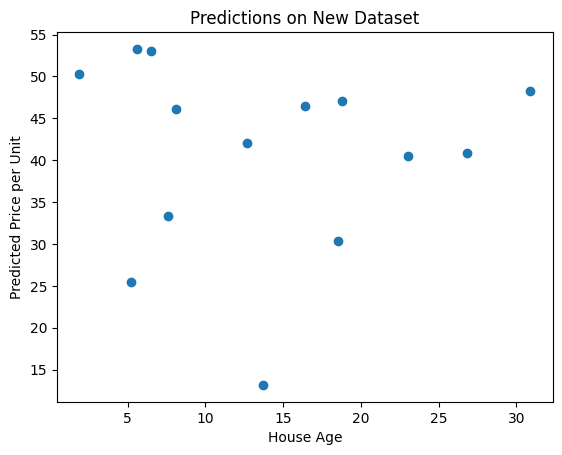

Predicted Prices on New Dataset:
[40.83543284 33.33528849 42.00927695 48.20634073 46.51572863 40.51085482
 50.32849661 25.46438762 30.31959253 13.16975575 53.28925866 47.04725888
 46.11502639 53.03504161]


In [68]:
# Load the new dataset (replace 'new_data.csv' with the actual path or URL of your new dataset)
new_data = pd.read_csv('E:\\KRMU\\Subject\\Aiml\\Assignment 3\\New_Data.csv')

# Use the pre-trained model to make predictions on the new dataset
new_predictions = model_all.predict(new_data[['House_Age', 'Dist_to_nearest_MRT', 'Number_of_stores', 'Latitude', 'Longitude']])

# Visualize the predictions on the new dataset
plt.scatter(new_data['House_Age'], new_predictions)
plt.xlabel('House Age')
plt.ylabel('Predicted Price per Unit')
plt.title('Predictions on New Dataset')
plt.show()

# Print the predicted values
print("Predicted Prices on New Dataset:")
print(new_predictions)
